In [1]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.1.0'

In [2]:
import pandas as pd

pd.__version__

'0.24.2'

In [4]:
import folium
from folium import Map
from folium.plugins import HeatMap

folium.__version__

'0.10.0'

In [5]:
import matplotlib.font_manager as fm

[font for font in fm.fontManager.ttflist if 'Gothic' in font.name]

[<Font 'Century Gothic' (GOTHICBI.TTF) italic normal bold normal>,
 <Font 'Century Gothic' (GOTHICB.TTF) normal normal bold normal>,
 <Font 'HYGothic-Extra' (H2GTRE.TTF) normal normal 400 normal>,
 <Font 'Yu Gothic' (YuGothR.ttc) normal normal regular normal>,
 <Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal demi condensed>,
 <Font 'Franklin Gothic Medium' (framd.ttf) normal normal medium normal>,
 <Font 'Yu Gothic' (YuGothM.ttc) normal normal medium normal>,
 <Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal bold normal>,
 <Font 'NanumGothic' (NanumGothicBold.ttf) normal normal bold normal>,
 <Font 'Franklin Gothic Heavy' (FRAHV.TTF) normal normal heavy normal>,
 <Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal demi normal>,
 <Font 'Showcard Gothic' (SHOWG.TTF) normal normal 400 normal>,
 <Font 'Yu Gothic' (YuGothL.ttc) normal normal light normal>,
 <Font 'NanumGothic' (NanumGothic.ttf) normal normal 400 normal>,
 <Font 'Franklin Gothic Medium Cond' (FRAM

In [19]:
plt.rcParams['font.family'] = 'NanumGothic'

In [11]:
df = pd.read_csv('traditional_market.csv', encoding='euc-kr', low_memory=False)

df.columns

Index(['시장명', '시장유형', '소재지도로명주소', '소재지지번주소', '시장개설주기', '위도', '경도', '점포수',
       '취급품목', '사용가능상품권', '홈페이지주소', '공중화장실보유여부', '주차장보유여부', '개설년도', '전화번호',
       '데이터기준일자', '제공기관코드', '제공기관명', 'Unnamed: 18'],
      dtype='object')

In [12]:
df.shape

(3781, 19)

In [14]:
df.head(1)

,시장명,시장유형,소재지도로명주소,소재지지번주소,시장개설주기,위도,경도,점포수,취급품목,사용가능상품권,홈페이지주소,공중화장실보유여부,주차장보유여부,개설년도,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 18
0,원당시장,상설장,경기도 고양시 덕양구 호국로790번길17,경기도 고양시 덕양구 성사동697-14,매일,37.656285,126.837309,59.0,농수축산물+잡화,온누리상품권,NaN,N,Y,2005.0,031-963-0013,2018-07-10,3940000,경기도 고양시,NaN


In [15]:
df.isnull().sum()

시장명               0
시장유형              0
소재지도로명주소         42
소재지지번주소         148
시장개설주기            0
위도               77
경도               77
점포수              87
취급품목            270
사용가능상품권         377
홈페이지주소         1743
공중화장실보유여부       161
주차장보유여부         132
개설년도            279
전화번호           1266
데이터기준일자           0
제공기관코드            0
제공기관명             0
Unnamed: 18    3781
dtype: int64

In [16]:
simple_df = df.drop(columns=[
    '소재지지번주소', '사용가능상품권', '홈페이지주소', '전화번호',
    '데이터기준일자', '제공기관코드', '제공기관명', 'Unnamed: 18'
])

simple_df.head()

,시장명,시장유형,소재지도로명주소,시장개설주기,위도,경도,점포수,취급품목,공중화장실보유여부,주차장보유여부,개설년도
0,원당시장,상설장,경기도 고양시 덕양구 호국로790번길17,매일,37.656285,126.837309,59.0,농수축산물+잡화,N,Y,2005.0
1,능곡시장,상설장,경기도 고양시 덕양구 능곡로12-9,매일,37.621256,126.821165,78.0,농수축산물+잡화,Y,N,2011.0
2,일산시장,상설장,경기도 고양시 일산서구 일청로12번길9,매일,37.685734,126.770918,88.0,농수축산물+잡화,Y,Y,1979.0
3,패션1번지,상설장,경기도 고양시 일산서구 탄중로101번길13,매일,37.693001,126.755748,59.0,패션의류,Y,Y,2007.0
4,원당시장,상설장,경기도 고양시 덕양구 호국로790번길17,매일,37.656285,126.837309,59.0,농수축산물+잡화,N,Y,2005.0


In [17]:
data = simple_df['시장유형'].value_counts()

pd.DataFrame(data)

,시장유형
상설장,2732
5일장,879
상설장+5일장,167
상설장 + 5일장,2
3일장,1


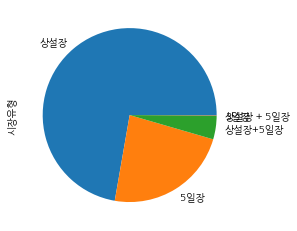

In [20]:
data = simple_df['시장유형'].value_counts()

data.plot.pie()
plt.show()

In [24]:
data = simple_df['시장개설주기'].value_counts().nlargest(8)

pd.DataFrame(data)

,시장개설주기
매일,1439
상설장,998
5일,430
상설,94
상설시장,83
상시,40
"4일, 9일",38
1일+6일,33


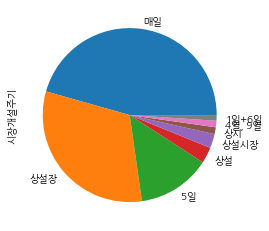

In [25]:
data = simple_df['시장개설주기'].value_counts().nlargest(8)

data.plot.pie()

plt.show()

In [30]:
data = simple_df['취급품목'].value_counts().nlargest(20)

pd.DataFrame(data)

,취급품목
농산물+축산물+수산물+가공식품+의류및신발+가정용품+음식점업+기타소매업+근린생활서비스 등,450
"농산물, 생필품, 수산물, 잡화 등",230
농산물+축산물+수산물+가공식품+의류및신발+가정용품+음식점업+기타소매업 등,129
농산물,42
잡화,41
"농산물 생필품, 수산물, 잡화 등",38
농산물 생필품+ 수산물+ 잡화 등,38
"식품, 잡화",34
"농수산물, 생필품,잡화 등",30
"농축수산물, 잡화",30


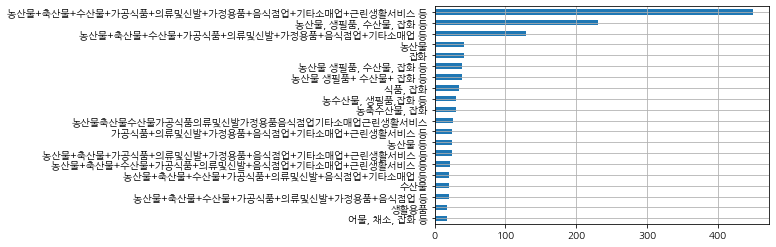

In [33]:
data = simple_df['취급품목'].value_counts().nlargest(20)

data.sort_values().plot.barh(grid=True)

plt.show()

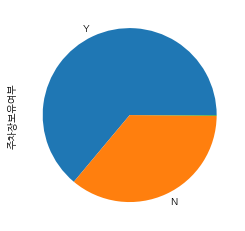

In [42]:
# data = simple_df['주차장보유여부'].str.upper().value_counts().nlargest(20)

data = simple_df['주차장보유여부'].str.upper().value_counts()

data.plot.pie()
plt.show()

In [40]:
simple_df.sort_values(by='개설년도').head(10)

,시장명,시장유형,소재지도로명주소,시장개설주기,위도,경도,점포수,취급품목,공중화장실보유여부,주차장보유여부,개설년도
448,마산어시장,상설장,경상남도 창원시 마산합포구 복요리로7(동성동),매일,35.203758,128.578973,1179.0,수산물,Y,Y,1780.0
248,북평민속시장,5일장,강원도 동해시 오일장길 32,"3일, 8일",37.482509,129.125962,800.0,"농산물, 생필품,수산물, 잡화 등",Y,Y,1796.0
519,중앙시장,상설장,경상남도 진주시 진양호로547번길 8-1(대안동),매일,35.194208,128.084963,1002.0,"농산물, 생필품, 수산물, 잡화 등",Y,Y,1884.0
1239,성주전통시장,상설장+5일장,경상북도 성주군 성주시장길 43-1,상설+2일+7일,35.915603,128.285989,45.0,국밥외,Y,Y,1887.0
619,덕산시장,5일장,충청남도 예산군 덕산면 읍내북문길 14-1,"4일, 9일",36.705083,126.668190,50.0,"농수산물, 공산품, 잡화",Y,Y,1887.0
3649,성주시장,상설장,경상북도 성주군 성주읍 시장길 43-1,매일,35.915025,128.285479,45.0,"농산물, 생필품, 수산물, 잡화 등",Y,Y,1887.0
176,함열시장,상설장+5일장,전라북도 익산시 함열읍 와리2길 8,매일+2일+7일,36.081047,126.958498,34.0,농수산물 등,Y,Y,1902.0
691,함평5일시장,5일장,전라남도 함평군 함평읍 시장길 105,"매 2일, 7일",35.064445,126.520663,82.0,"공산품, 수산물, 농산물 등",Y,Y,1903.0
706,함평5일시장,5일장,전라남도 함평군 함평읍 시장길 105,"매 2일, 7일",35.064445,126.522947,82.0,"공산품, 수산물, 농산물 등",Y,Y,1903.0
3241,광장시장,상설장,서울특별시 종로구 창경궁로 88,매일,37.570002,126.998902,1250.0,"농산물,수산물,생필품,잡화",Y,N,1905.0


In [43]:
address_df = simple_df[pd.notnull(simple_df['위도']) & pd.notnull(simple_df['경도'])]

simple_df.shape, address_df.shape

((3781, 11), (3704, 11))

In [44]:
sample_df = address_df.sample(n=500, random_state=1)

sample_df.head()

,시장명,시장유형,소재지도로명주소,시장개설주기,위도,경도,점포수,취급품목,공중화장실보유여부,주차장보유여부,개설년도
1708,신평시장,5일장,경상남도 양산시 하북면 순지리 575,5일,35.490883,129.085964,22.0,가공식품+의류및신발+가정용품+음식점업+기타소매업+근린생활서비스 등,Y,N,2010.0
3652,㈜사러가시장,상설장,서울특별시 영등포구 신길로 155,매일,37.506146,126.910349,47.0,"의류, 잡화",Y,Y,1965.0
600,영동전통시장,상설장,서울특별시 강남구 강남대로 128길 20,매일,37.509994,127.023824,130.0,"식품,공산품 등",N,N,2011.0
2624,흥부시장,5일장,경상북도 울진군 북면 장터길 104,5일,35.196782,129.069468,26.0,농산물+수산물+의류및신발+음식점업 등,Y,Y,1982.0
395,부천자유시장,상설장,경기도 부천시 자유로33,매일,37.483976,126.779898,315.0,과일+야채+생선등,Y,N,1947.0


In [45]:
map = Map(location=[36.5, 127.5], zoom_start=7)

data = sample_df[['위도', '경도']].groupby(['위도', '경도']).sum().reset_index().values.tolist()

HeatMap(data=data, radius=20).add_to(map)

for lat, lng in data:
    marker = folium.Circle(
        location=[lat, lng],
        radius=500,
        weight=1,
        fill_color='#F00',
        fill_opacity=0.3,
    )
    marker.add_to(map)

map